# First ML MODEL

## Load DataSet

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
import os
import pandas as pd

file_path = 'delaney_solubility_with_descriptors.csv'

if os.path.isfile(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"The file '{file_path}' does not exist.")


The file 'delaney_solubility_with_descriptors.csv' does not exist.


In [14]:
import os
os.getcwd()

'C:\\Users\\ragha\\Datasets'

In [15]:
%cd \Users\\ragha\\Datasets

C:\Users\ragha\Datasets


In [16]:
%pwd

'C:\\Users\\ragha\\Datasets'

In [17]:
dt_set = pd.read_csv('delaney_solubility_with_descriptors.csv')

In [18]:
dt_set


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preparation

##### Data Seperation as x and Y

In [38]:
Y = dt_set['logS']
X = dt_set.drop('logS',axis = 1)

In [45]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [46]:
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

##### Data Splitting

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 100)

In [43]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [44]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [47]:
Y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [48]:
Y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

## Model Building

### Linear Regression

##### Training the model

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

##### Apply the model to make predictions

In [51]:
Y_lr_train_Pred = lr.predict(X_train)
Y_lr_test_Pred = lr.predict(X_test)


##### Evaluate the model

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(Y_train,Y_lr_train_Pred)
lr_train_r2 = r2_score(Y_train,Y_lr_train_Pred)

lr_test_mse = mean_squared_error(Y_test,Y_lr_test_Pred)
lr_test_r2 = r2_score(Y_test,Y_lr_test_Pred)

In [60]:
lr_results = pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Methods','Training_mse','Training_r2','Testing_mse','Testing_r2']
lr_results

,Methods,Training_mse,Training_r2,Testing_mse,Testing_r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


### Random Forest

##### Training the model

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2,random_state = 100)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

##### Apply the model to make predictions

In [63]:
Y_rf_train_Pred = rf.predict(X_train)
Y_rf_test_Pred = rf.predict(X_test)


##### Evaluate the model

In [64]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse = mean_squared_error(Y_train,Y_rf_train_Pred)
rf_train_r2 = r2_score(Y_train,Y_rf_train_Pred)

rf_test_mse = mean_squared_error(Y_test,Y_rf_test_Pred)
rf_test_r2 = r2_score(Y_test,Y_rf_test_Pred)

In [65]:
rf_results = pd.DataFrame(['Random_Forest ',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Methods','Training_mse','Training_r2','Testing_mse','Testing_r2']
rf_results

,Methods,Training_mse,Training_r2,Testing_mse,Testing_r2
0,Random_Forest,1.028228,0.759669,1.407688,0.709223


## Models Comparision

In [68]:
df_models = pd.concat([lr_results,rf_results],axis = 0).reset_index(drop = True)

In [69]:
df_models

,Methods,Training_mse,Training_r2,Testing_mse,Testing_r2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random_Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization

Text(0, 0.5, 'Predicted logS')

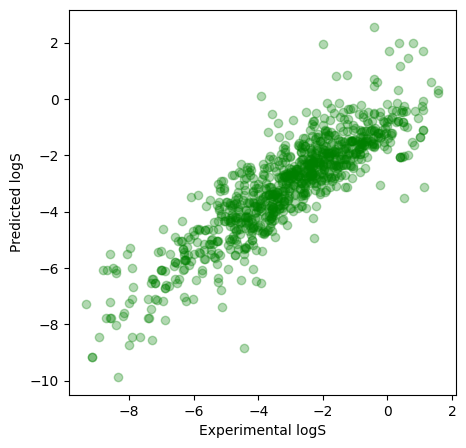

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.scatter(x = Y_train,y = Y_lr_train_Pred,color = 'Green',alpha = 0.3)

plt.plot()

plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')